In [1]:
from sympy import *

# 为测量飞机起飞表演，飞机的水平位置从 t=0.2 到 t=12 每秒测量一次，具体位置是：
# 0, 8.8, 29.9, 62.0, 104.7,160, 222.0, 294.5, 380.4, 471.1, 571.7, 686.8, 809.2。  <<<<<<这里题干有误，第6个数为150
# a,求这些数据的最小二乘立方曲线 y = β0 + β1 * t + β2 * t^2 + β3 * t^3
# b,利用（a）的结果，估计当 t 等于 4.5 秒时飞机的水平速度。

A = Matrix(13,4, lambda i,j: i**j)
A

Matrix([
[1,  0,   0,    0],
[1,  1,   1,    1],
[1,  2,   4,    8],
[1,  3,   9,   27],
[1,  4,  16,   64],
[1,  5,  25,  125],
[1,  6,  36,  216],
[1,  7,  49,  343],
[1,  8,  64,  512],
[1,  9,  81,  729],
[1, 10, 100, 1000],
[1, 11, 121, 1331],
[1, 12, 144, 1728]])

In [2]:
B = Matrix([0, 8.8, 29.9, 62.0, 104.7, 150, 222.0, 294.5, 380.4, 471.1, 571.7, 686.8, 809.2])
B

Matrix([
[    0],
[  8.8],
[ 29.9],
[ 62.0],
[104.7],
[  150],
[222.0],
[294.5],
[380.4],
[471.1],
[571.7],
[686.8],
[809.2]])

In [3]:
X = A.pinv()*B
X

Matrix([
[  0.144230769230774],
[   3.16309107559107],
[   5.80536963036963],
[-0.0379662004662005]])

In [4]:
# y = 0.1442 +  3.1631 * t +  5.8054 * t^2 - 0.0380 * t^3
# t=4.5时：
Matrix(1,4,lambda i,j: 4.5**j) * X

Matrix([[128.477205606893]])

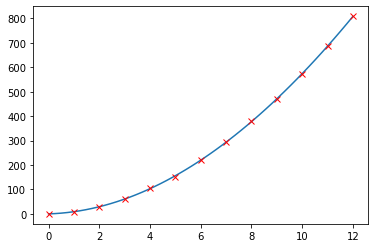

In [6]:
# 绘图：
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,12,50)
y = 0.1442 +  3.1631 * x +  5.8054 * x**2 - 0.0380 * x**3
plt.figure(1)
plt.plot(x,y)

ptszip = zip( np.linspace(0,12,13) , [x for [x] in B.tolist()] )
pts = list(ptszip)
# 将时间点和飞行距离组成坐标点。

for i,j in pts:
    plt.plot(i,j, 'rx')
    # 'rx'表示红色×号点

plt.show()